Processed 34 valid data points out of 34 files.
z = 1.0 mm, Width_x = 3.426 mm, Width_y = 3.484 mm
z = 1.5 mm, Width_x = 3.186 mm, Width_y = 3.344 mm
z = 2.0 mm, Width_x = 2.964 mm, Width_y = 3.183 mm
z = 2.5 mm, Width_x = 2.783 mm, Width_y = 3.020 mm
z = 3.0 mm, Width_x = 2.669 mm, Width_y = 2.844 mm
z = 3.5 mm, Width_x = 2.568 mm, Width_y = 2.683 mm
z = 4.0 mm, Width_x = 2.471 mm, Width_y = 2.510 mm
z = 4.5 mm, Width_x = 2.358 mm, Width_y = 2.338 mm
z = 5.0 mm, Width_x = 2.212 mm, Width_y = 2.164 mm
z = 5.5 mm, Width_x = 2.030 mm, Width_y = 1.976 mm
z = 6.0 mm, Width_x = 1.848 mm, Width_y = 1.799 mm
z = 6.5 mm, Width_x = 1.627 mm, Width_y = 1.610 mm
z = 7.0 mm, Width_x = 1.383 mm, Width_y = 1.411 mm
z = 7.5 mm, Width_x = 1.147 mm, Width_y = 1.210 mm
z = 8.0 mm, Width_x = 0.908 mm, Width_y = 0.963 mm
z = 8.5 mm, Width_x = 0.675 mm, Width_y = 0.691 mm
z = 9.0 mm, Width_x = 0.445 mm, Width_y = 0.433 mm
z = 9.5 mm, Width_x = 0.210 mm, Width_y = 0.185 mm
z = 9.6 mm, Width_x = 0.164 mm, Wi

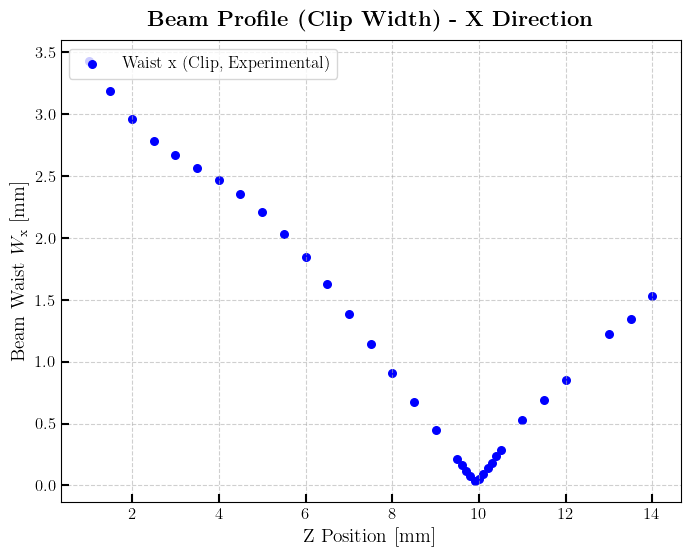

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_telescoping/fig/beam_profile_clip_y.png


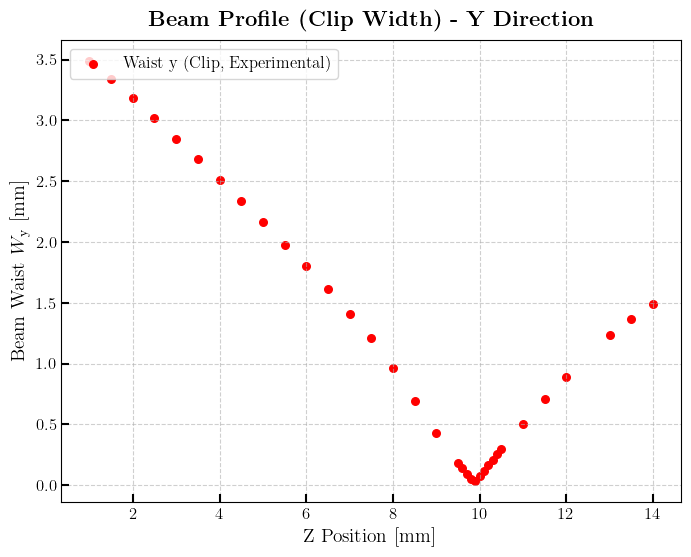

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_telescoping"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower()],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                # Check for "--" or invalid values before conversion
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    # Only append if valid data found
    if clip_width_x is not None and clip_width_y is not None:
        width_x.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values.append(z)  # Only append z if valid widths found
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert to numpy arrays
z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort by z_values
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Clip, Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Clip Width) - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_clip_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Clip, Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Clip Width) - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_clip_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Processed 34 valid data points out of 34 files.
z = 1.0 mm, Width_x = 3.305 mm, Width_y = 3.402 mm
z = 1.5 mm, Width_x = 3.136 mm, Width_y = 3.253 mm
z = 2.0 mm, Width_x = 2.962 mm, Width_y = 3.100 mm
z = 2.5 mm, Width_x = 2.804 mm, Width_y = 2.943 mm
z = 3.0 mm, Width_x = 2.675 mm, Width_y = 2.775 mm
z = 3.5 mm, Width_x = 2.554 mm, Width_y = 2.625 mm
z = 4.0 mm, Width_x = 2.433 mm, Width_y = 2.457 mm
z = 4.5 mm, Width_x = 2.298 mm, Width_y = 2.297 mm
z = 5.0 mm, Width_x = 2.144 mm, Width_y = 2.128 mm
z = 5.5 mm, Width_x = 1.965 mm, Width_y = 1.948 mm
z = 6.0 mm, Width_x = 1.777 mm, Width_y = 1.775 mm
z = 6.5 mm, Width_x = 1.583 mm, Width_y = 1.588 mm
z = 7.0 mm, Width_x = 1.370 mm, Width_y = 1.397 mm
z = 7.5 mm, Width_x = 1.144 mm, Width_y = 1.190 mm
z = 8.0 mm, Width_x = 0.915 mm, Width_y = 0.942 mm
z = 8.5 mm, Width_x = 0.704 mm, Width_y = 0.677 mm
z = 9.0 mm, Width_x = 0.503 mm, Width_y = 0.426 mm
z = 9.5 mm, Width_x = 0.292 mm, Width_y = 0.182 mm
z = 9.6 mm, Width_x = 0.251 mm, Wi

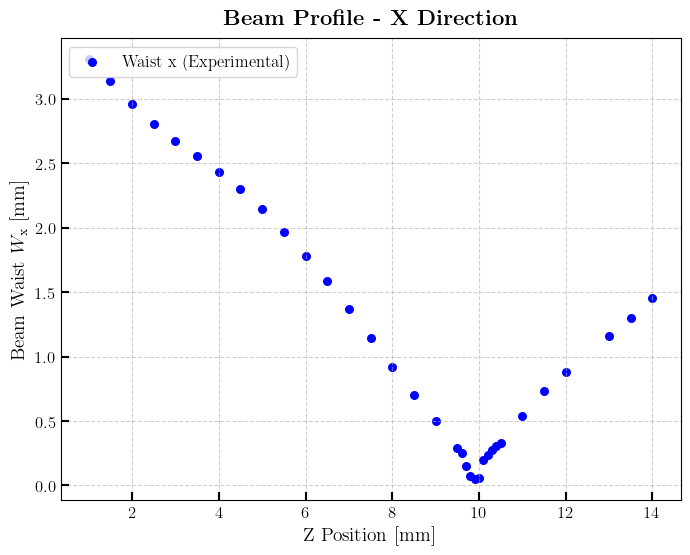

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_telescoping/fig/beam_profile_y.png


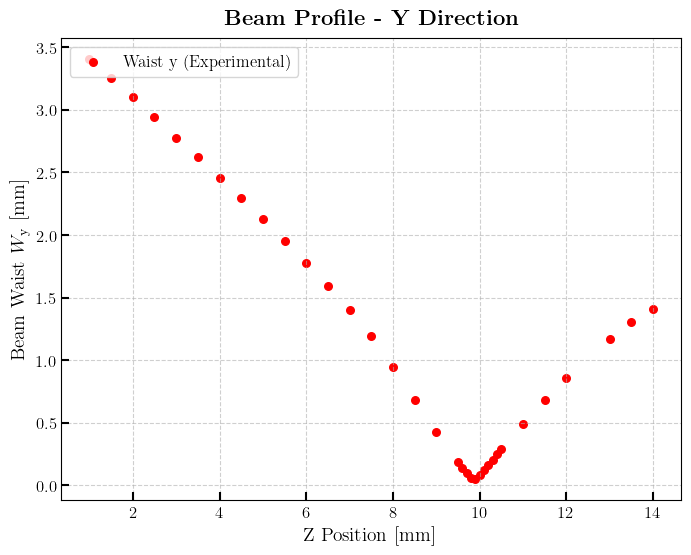

In [5]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_telescoping"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower() and 
                    float(os.path.basename(f).split('mm')[0].strip()) <= 14],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    z_values.append(z)
    width_x.append(gaussian_dia_x / 2 / 1000)  # Convert µm to mm, diameter to radius
    width_y.append(gaussian_dia_y / 2 / 1000)  # Convert µm to mm, diameter to radius

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X: {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()